You are given a training dataset in CSV format (hw4_cluster.csv). The files each contain 40 rows with 2 columns. Column 1 & 2 are the features. There are no labels for this dataset. Your goal for this assignment is to implement different clustering algorithms and run them on this dataset. For this assignment you can assume the distance function is the Euclidean distance.



1) (35 points) Implement a generalized K-means/median algorithm. You should have a single function that takes in as input the data points, K, and some other hyperparameters, specified below. The function should return K sets of data points. Each set corresponding to one cluster.

The hyperparameters your functions should support and the values they can take are:

-The method for calculating the centroid: Means or Median

-The initialization method: Random Split Initialization or Random Seed Selection Method 

-Max_iter: max number of iterations to run the algorithm.

-K: number of clusters

Note that your stopping condition should have two parts: 

1) stop if you reach the max iterations

2) stop if no change is made to the clusters in the last step.

You will be running this code in question 3 of the assignment. For this part you just need to implement the function.


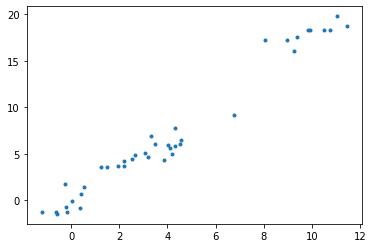

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

csvname = 'hw4_cluster.csv'
data = pd.read_csv(csvname)
#x = np.array(data[["x1"]]).T
#y = np.array(data[["x2"]]).T
plt.plot(data[["x1"]], data[["x2"]],".")
plt.show()

def euclideanDistance(pt1,pt2): 
    distance = np.sum(np.square(pt1 - pt2))
    return np.sqrt(distance)

In [14]:
def assign(x, centers):
    k_labels = []
    #centers = np.array(x.sample(n = k))
    for i in range(len(x)):
        distance = []
        for center in range(len(centers)):
            distance.append(euclideanDistance(x.iloc[i],centers[center]))
        k_labels.append(np.argmin(distance))
    return k_labels

def update_center(x,k,k_labels,method):
    new_center = []
    k_labels = np.array(k_labels)
    x = np.array(x)
    for i in range(0,k):
        x1 = []
        x2 = []
        cur_cluster = np.where(k_labels == i)[0]
        for j in cur_cluster:
            x1.append(x[j][0])
            x2.append(x[j][1])
        if method == "mean":    
            new_center.append([np.mean(x1),np.mean(x2)])
        if method == "median":
            new_center.append([np.median(x1),np.median(x2)])
    return new_center 

def k_cluster(data,k,method,initial,max_iter):
    if initial == "random seed selection":
        centers = np.array(data.sample(n = k))
        k_labels = np.array(assign(data,centers))
        
    if initial == "random split":
        k_labels = np.random.randint(k, size=len(data))
        centers = update_center(data, k= k, k_labels = k_labels, method = method)
    
    for i in range(max_iter):
        former_center = centers
        centers = update_center(data, k= k, k_labels = k_labels, method = method)
        k_labels = np.array(assign(data,centers))
        if np.array_equal(former_center,centers) and i > 1 :
            break
            
    k_clusters = []
    data = np.array(data)
    for i in range(k):
        kthcluster_label = np.where(k_labels == i)[0]
        k_clusters.append(data[kthcluster_label])
    
    return k_labels, k_clusters

In [17]:
result = k_cluster(data, k=3, method="mean", initial = "random split", max_iter=100)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

2) (15 points) Silhouette score.
In this part of the assignment, you are implementing a function that calculates the Silhouette score for a list of clusters. The function should take in a list of clusters (such as the output of the last function you implemented) and return a single Silhouette score.

In [4]:
def Silhouette(data, k_labels):
    k = len(set(k_labels))
    sil = []
    data = np.array(data)
    for cur_k in range(k): 
        cur_cluster = np.where(k_labels == cur_k)[0]
        other_cluster = np.where(k_labels != cur_k)[0]
        for i in cur_cluster:
            a = euclideanDistance(data[i],data[cur_cluster])/(len(cur_cluster)-1)
            b = euclideanDistance(data[i],data[other_cluster])/len(other_cluster)
            sil.append((b-a)/ max(a,b)) 
    silhouette = np.sum(sil)
    return silhouette

3) (15 points) Finding best K.
Run the code you implemented in question 1 for k=2,3,4,5. Set the other hyperparameters to the following:
-The method for calculating the centroid: Mean
-The initialization method: Random Split Initialization -Max_iterations: 100
Calculate the silhouette score for each K using the function in question 2 and use these scores to pick the best K. What is the best K?

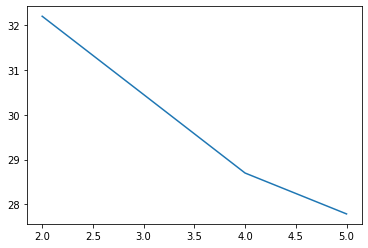

In [7]:
SSE = []
for k in range(2,6):
    result =  k_cluster(data, k=k, method="mean", initial = "random split", max_iter=100)[0]
    SSE.append(Silhouette(data,result)) 
plt.plot(np.arange(2,6),SSE, "-")



**5 is best k value**

**Bonus questions:** 
Don’t be so Naïve!
You are given a training dataset in CSV format (hw4_naive.csv). The training data has 5,600 rows:
• Columns 1 through 6 of the given CSV file represent the features (X) • The last column (“Label”) represents the class label (Y) (0 or 1)
You are required to implement the following models and train/test them using this
dataset. Note that you can use sklearn unless the question asks that you implement your code from scratch.


1) (5 points) Divide the data into test / train sets (80% and 20% respectively)

In [ ]:
import pandas as pd
naive_data = pd.read_csv('hw4_naive.csv')
naive_data

In [ ]:
from sklearn.model_selection import train_test_split 
y = weather_data["Label"]
x = weather_data.drop(['Label'],1)
x.train, x.test, y.train, y.test = train_test_split(x,y,test_size=0.20, random_state=42)

2) (25 points) Implement a Multinomial Naïve Bayes classifier from scratch, with smoothing (you can set the default smoothing value to 1). You are free to code this up however you like, however, make sure that there is a function that can be called with a test X vector and returns the predicted Y.

3) (25 points) Implement a Gaussian Naïve Bayes classier from scratch (no need for smoothing here).

4) (10 points) Calculate the accuracy and the F1 score of test data using both of your models implemented above.